In [1]:
import pandas as pd 
import os
from email.parser import Parser
import nltk
import numpy as np
import json
import glob
import matplotlib.pyplot as plt

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
nltk.download('stopwords')

/home/dilsad/Desktop/BeCode/Enron_UseCase_Clustering/env/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
[nltk_data] Downloading package stopwords to /home/dilsad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
root = '/home/dilsad/Downloads/maildir/'
folder_name = os.listdir(root)
to_email = []
from_email = []
email_body = []
directory = []
date = []
subject = []
errors = []


def analysis(input_file, to_email, from_email, email_body):
    
    with open(input_file, 'r', encoding='utf-8') as f:
        try:
            data = f.read()
            email = Parser().parsestr(data)
            date.append(email['Date'])
            subject.append(email['subject'])
            to_email.append(email['to'])
            from_email.append(email['from'])
            directory.append(input_file)
            email_body.append(email.get_payload())
        except:
            errors.append(input_file)


for name in folder_name:
    direct = f'{root}{name}'
    for dir, folders, filenames in os.walk(direct):
        for filename in filenames:
            input_file = os.path.join(dir, filename)
            analysis(input_file, to_email, from_email, email_body)

dictionary = {'Directory' : directory, 'From' : from_email, 'To' : to_email, 'Body' : email_body, 'Date': date, 'Subject': subject}
#data_frame = pd.DataFrame(dictionary)
#data_frame.to_csv('/home/dilsad/Downloads/emails.csv', index=False)
with open("/home/dilsad/Downloads/emailJson.json", "w") as outfile:
    json.dump(dictionary, outfile)

In [2]:
#df = pd.read_csv('/home/dilsad/Downloads/emails.csv')

In [3]:
df = pd.read_csv('/home/dilsad/Downloads/lay_k_emails.csv')

In [4]:
df.shape

(3402, 5)

In [5]:
df.head(10)

,From,To,Date,Subject,Body
0,rosalee.fleming@enron.com,mmilken@knowledgeu.com,"Fri, 2 Jul 1999 03:34:00 -0700 (PDT)",Re: testing,Hi -\n\nWe did receive the e-mail.\n\nRosalee ...
1,no.address@enron.com,"kenneth.lay@enron.com, jlaywp@aol.com, mrslind...","Tue, 17 Aug 1999 15:14:00 -0700 (PDT)",Tentative Schedule,Jose Luis is planning on flying into Miami on ...
2,jeffrey.garten@yale.edu,kenneth.lay@enron.com,"Wed, 17 May 2000 01:32:00 -0700 (PDT)",Panel on Valuation in the New Economy - May 23,"Dear Ken,\n\nAttached are the agenda and the d..."
3,ralph.blakemore@enron.com,"kenneth.lay@enron.com, jeff.skilling@enron.com","Fri, 8 Dec 2000 07:49:00 -0800 (PST)",2000 Chairman's Award,"Gentlemen,\n\nThank you for the letter memoria..."
4,barbara.paige@enron.com,"samantha.bryce@enron.com, adriana.cortes@enron...","Mon, 11 Dec 2000 01:52:00 -0800 (PST)",Field Study Program,A description of the proposed Field Study Prog...
5,william.ramsay@iea.org,kenneth.lay@enron.com,"Mon, 11 Dec 2000 09:02:00 -0800 (PST)",RE: IEA Ministerial/OECD Ministerial,Rosalee: Thank you for this good news. I wil...
6,rosalee.fleming@enron.com,shea_dugger@i2.com,"Mon, 11 Dec 2000 02:49:00 -0800 (PST)",Re: Final Eagle BOD Presentation,Here it is!! Have a great day!! Stay warm.\n...
7,nancy@newcapitolsolutions.com,kenneth.lay@enron.com,"Mon, 11 Dec 2000 04:01:00 -0800 (PST)",Richard's Resume,"Dear Ken,\n\nMy son, Richard, recently sold hi..."
8,rosalee.fleming@enron.com,kevin.hannon@enron.com,"Mon, 11 Dec 2000 06:39:00 -0800 (PST)",Re: Cornell,Ken wanted me to let you know that he has some...
9,rosalee.fleming@enron.com,kelly.merritt@enron.com,"Mon, 11 Dec 2000 09:04:00 -0800 (PST)",Re: Advertising Campaign - NASCAR,Dear Kelly:\n\nI appreciate your comments rega...


In [6]:
df.tail(10)

,From,To,Date,Subject,Body
3392,barblpl@yahoo.com,"mary.bourne@showtime.net, herrold@swbell.net, ...","Tue, 5 Jun 2001 17:05:02 -0700 (PDT)",Family dinner,"Hello Everyone,\nJust a friendly reminder that..."
3393,annatjain@hotmail.com,kenneth.lay@enron.com,"Sat, 13 Oct 2001 05:57:00 -0700 (PDT)",Conflict of Interest,"\nDear Mr. Lay,\n\nThank you for your email me..."
3394,gargravi@hotmail.com,kenneth.lay@enron.com,"Sat, 13 Oct 2001 09:37:18 -0700 (PDT)",Dabhol India - Illegal Action and Criminal Con...,Sir\n\nI am an Enron employee.\n\nI tried to s...
3395,mlpdgrace@yahoo.com,"klay@enron.com, bruce.connery@elpaso.com, brid...","Tue, 5 Jun 2001 22:05:43 -0700 (PDT)",A PRAYER FOR THE FALL AND DESTRUCTION OF CEOS ...,ALMIGHTY AND EVER LIVING GOD MAY THE HEDIOUS...
3396,mingchenglian@aol.com,kenneth.lay@enron.com,"Thu, 18 Oct 2001 08:27:37 -0700 (PDT)",my unfair treatment at Enron--Please HELP,...
3397,james.derrick@enron.com,"sharon.butcher@enron.com, michelle.cash@enron.com","Thu, 18 Oct 2001 08:44:59 -0700 (PDT)",FW: my unfair treatment at Enron--please HELP,I would appreciate your looking into this issu...
3398,linda.auwers@compaq.com,NaN,"Fri, 19 Oct 2001 08:15:52 -0700 (PDT)",Moritz Craven,\nJudy called to let us know that Moritz Crav...
3399,ryan.seleznov@enron.com,"kenneth.lay@enron.com, mark.frevert@enron.com,...","Fri, 19 Oct 2001 12:55:36 -0700 (PDT)",Employee Concern,I wanted to assure all of you that the issues ...
3400,david.oxley@enron.com,kenneth.lay@enron.com,"Fri, 19 Oct 2001 13:17:00 -0700 (PDT)",RE: Enron Metals Ltd (Enron Europe Office),"Ken,\n\nThis gentleman joined Enron Europe fol..."
3401,elizabeth.davis@compaq.com,houirtreas@compaq.com,"Wed, 6 Jun 2001 07:22:10 -0700 (PDT)",Financial Analysts' Reports for 6.06.01,\nPlease open the attached file to read the co...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   From     3402 non-null   object
 1   To       3246 non-null   object
 2   Date     3402 non-null   object
 3   Subject  3349 non-null   object
 4   Body     3402 non-null   object
dtypes: object(5)
memory usage: 133.0+ KB


In [ ]:
body = " ".join(df['Body'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width = 800,
                        height=600,
                        max_words = 200, 
                        stopwords = stopwords.words('english'))
ax.imshow(wc)
ax.axis('off')

In [9]:
data = df.Body.values.tolist()

In [10]:
# prep NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
data_words = list(sent_to_words(data))
print(data_words[3])

['gentlemen', 'thank', 'you', 'for', 'the', 'letter', 'memorializing', 'my', 'nomination', 'for', 'the', 'chairman', 'award', 'it', 'is', 'privilege', 'to', 'be', 'part', 'of', 'the', 'enron', 'organization', 'have', 'received', 'many', 'promotions', 'cash', 'bonuses', 'and', 'commendations', 'during', 'my', 'career', 'but', 'consider', 'the', 'recognition', 'as', 'nominee', 'for', 'the', 'chairman', 'award', 'to', 'be', 'the', 'most', 'significant', 'acknowledgment', 'of', 'my', 'performance', 'ever', 'received', 'my', 'compliments', 'to', 'you', 'for', 'making', 'enron', 'one', 'of', 'the', 'most', 'successful', 'and', 'excellent', 'companies', 'on', 'the', 'globe', 'only', 'wish', 'that', 'could', 'contribute', 'more', 'to', 'enron', 'growth', 'and', 'continued', 'success', 'sincerely', 'rw', 'blakemore', 'enron', 'wind', 'energy', 'systems', 'corp', 'center', 'for', 'advanced', 'technology']


In [15]:
from gensim.models.phrases import Phrases, Phraser# Build the bigram and trigram models
bigram = Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = Phrases(bigram[data_words], threshold=100)# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = Phraser(bigram)
print(bigram_mod)

FrozenPhrases<2158 phrases, min_count=5, threshold=100>


In [16]:
# remove stop_words, make bigrams and lemmatize
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [17]:
data_words_nostops = remove_stopwords(data_words)

In [18]:
data_words_bigrams = make_bigrams(data_words_nostops)

In [ ]:
data_words_bigrams

In [21]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [22]:

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [83]:
data_lemmatized[0][0:90]

['receive', 'mail', 'mmilken', 'knowledgeu', 'testing']

In [23]:
# create dictionary and corpus both are needed for (LDA) topic modeling

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [73]:
id2word[0]

'knowledgeu'

In [ ]:
texts

In [32]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [74]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [75]:
print(lda_model.print_topics())

[(0, '0.017*"response" + 0.016*"know" + 0.015*"lie" + 0.013*"family" + 0.012*"work" + 0.012*"year" + 0.012*"send" + 0.011*"letter" + 0.010*"ask" + 0.010*"circumstance"'), (1, '0.122*"ect" + 0.038*"hou" + 0.026*"ee" + 0.026*"attend" + 0.022*"meeting" + 0.022*"conference" + 0.017*"th_floor" + 0.017*"number" + 0.016*"call" + 0.016*"executive"'), (2, '0.063*"compaq" + 0.057*"report" + 0.026*"result" + 0.025*"prepare" + 0.024*"analyst_report" + 0.024*"endorse" + 0.023*"reports_provide" + 0.023*"compaq_investor" + 0.021*"tech" + 0.021*"conigliaro"'), (3, '0.013*"information" + 0.009*"issue" + 0.009*"business" + 0.009*"new" + 0.008*"event" + 0.008*"independent" + 0.008*"www" + 0.007*"year" + 0.007*"see" + 0.007*"mail"'), (4, '0.590*"com" + 0.092*"aol" + 0.028*"net" + 0.020*"mail" + 0.019*"subject" + 0.013*"send" + 0.009*"hotmail" + 0.008*"email" + 0.006*"houston_rr" + 0.005*"original_message"'), (5, '0.246*"energy" + 0.111*"saving" + 0.042*"efficiency" + 0.024*"save" + 0.022*"workshop" + 0.02

In [76]:
doc_lda = lda_model[corpus]

In [77]:
print(doc_lda)

In [78]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -8.938937285608967


In [82]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.49415364178129606


In [81]:
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook(sort=True)
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='mmds', R = 20)
pyLDAvis.display(vis)

/home/dilsad/Desktop/BeCode/Enron_UseCase_Clustering/env/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/dilsad/Desktop/BeCode/Enron_UseCase_Clustering/env/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/dilsad/Desktop/BeCode/Enron_UseCase_Clustering/env/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/dilsad/Desktop/BeCode/Enron_UseCase_Clustering/env/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Loose

In [41]:
print(lda_model.show_topics(formatted=False))

[(12, [('victor', 0.011020545), ('isb', 6.665284e-05), ('usmcoc', 6.665247e-05), ('chapter', 6.665247e-05), ('taevs', 6.665247e-05), ('pramath_sinha', 6.665234e-05), ('greagory', 6.665213e-05), ('membership', 6.665213e-05), ('gregory', 6.665213e-05), ('dispose', 6.665213e-05)]), (16, [('independent', 0.17310196), ('org_tii', 0.093758054), ('lighthouse_lhlink', 0.084375), ('see', 0.063407406), ('independent_institute', 0.0544814), ('html', 0.04935933), ('lighthouse', 0.047181293), ('review', 0.019605987), ('oakland_ca', 0.017677203), ('swan_way', 0.01751782)]), (7, [('azurix', 0.075350545), ('garrison', 0.038885985), ('opic', 5.971016e-05), ('cable', 5.970774e-05), ('duchess', 5.97077e-05), ('enroncredit', 5.970644e-05), ('william_lloyd', 5.970545e-05), ('nce', 5.9703023e-05), ('handling', 5.9703023e-05), ('arena', 5.9703023e-05)]), (15, [('investor_relation', 0.03229414), ('brochure', 0.01666224), ('arlene', 0.0026721049), ('friday_peer', 6.3935804e-05), ('memo', 6.392478e-05), ('true_

In [47]:


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values



In [48]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

In [49]:
import matplotlib.pyplot as plt

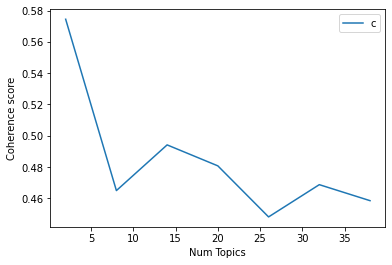

In [51]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [64]:
import joblib

joblib.dump(lda_model, 'lda_model.jl')
# then reload it with
lda_model = joblib.load('lda_model.jl')

In [52]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5745
Num Topics = 8  has Coherence Value of 0.4649
Num Topics = 14  has Coherence Value of 0.4942
Num Topics = 20  has Coherence Value of 0.4807
Num Topics = 26  has Coherence Value of 0.4481
Num Topics = 32  has Coherence Value of 0.4687
Num Topics = 38  has Coherence Value of 0.4585


In [60]:
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(24, '0.093*"wedding" + 0.054*"skille" + 0.028*"rsvp" + 0.025*"upset" + 0.014*"scenic" + 0.000*"wpo_org" + 0.000*"band" + 0.000*"images_admin" + 0.000*"photographer" + 0.000*"enewsletter_spacer"'), (12, '0.066*"entry" + 0.053*"paste" + 0.044*"stadium" + 0.020*"ban" + 0.018*"fortune" + 0.017*"viewer" + 0.011*"victor" + 0.010*"placement" + 0.000*"kudlow" + 0.000*"boc"'), (2, '0.106*"swbell_net" + 0.044*"houston_rr" + 0.035*"bulletin" + 0.033*"lng" + 0.029*"mena_petroleum" + 0.026*"blockbuster" + 0.022*"entertainment" + 0.021*"selection" + 0.020*"smi" + 0.018*"vp"'), (16, '0.192*"independent" + 0.066*"org_tii" + 0.059*"lighthouse_lhlink" + 0.057*"see" + 0.038*"independent_institute" + 0.035*"org" + 0.035*"html" + 0.033*"lighthouse" + 0.032*"public" + 0.025*"book"'), (20, '0.091*"transaction" + 0.044*"daily" + 0.039*"total" + 0.038*"day_traile" + 0.031*"enrononline" + 0.029*"number" + 0.028*"date" + 0.027*"log" + 0.027*"today" + 0.025*"external_user"'), (1, '0.159*"ect" + 0.049*"hou" + 0.

In [ ]:
num_topics = 14
num_word = 10

list_ = lda_model.print_topic(num_topics, num_word)
topic_words =[]

for i in range(0, len[list_]

In [61]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        print(row[1])
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [62]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

[(0, []), (1, [11, 18]), (2, []), (3, [11, 18]), (4, [18])]


TypeError: '<' not supported between instances of 'int' and 'tuple'

In [63]:
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

NameError: name 'df_topic_sents_keywords' is not defined